<a href="https://colab.research.google.com/github/Renad-CAI/T5_Labs/blob/main/Lab_exam_week_4_Task_2_Convolutional_Neural_Networks_(CNN)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict the type of traffic sign. You are provided with a dataset of traffic sign images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing)
### **Dataset Name:** Traffic Signs

### **Description:**  
The dataset contains images of various German traffic signs labeled for classification purposes. Each image belongs to one of the 43 classes, representing different types of traffic signs.

### **Labels:**
```python
classes = {
    0:  'Speed limit (20km/h)',
    1:  'Speed limit (30km/h)',
    2:  'Speed limit (50km/h)',
    3:  'Speed limit (60km/h)',
    4:  'Speed limit (70km/h)',
    5:  'Speed limit (80km/h)',
    6:  'End of speed limit (80km/h)',
    7:  'Speed limit (100km/h)',
    8:  'Speed limit (120km/h)',
    9:  'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}
```



## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing).

In [1]:
#https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing
!pip install gdown
!gdown --id 1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ
!unzip Traffic_Signs.zip

Streaming output truncated to the last 5000 lines.
 extracting: Traffic_Signs/Dataset/13/00013_00004_00022.png  
  inflating: Traffic_Signs/Dataset/13/00013_00021_00029.png  
  inflating: Traffic_Signs/Dataset/13/00013_00003_00023.png  
 extracting: Traffic_Signs/Dataset/13/00013_00063_00007.png  
 extracting: Traffic_Signs/Dataset/13/00013_00034_00029.png  
  inflating: Traffic_Signs/Dataset/13/00013_00045_00013.png  
  inflating: Traffic_Signs/Dataset/13/00013_00068_00019.png  
 extracting: Traffic_Signs/Dataset/13/00013_00003_00004.png  
 extracting: Traffic_Signs/Dataset/13/00013_00017_00010.png  
 extracting: Traffic_Signs/Dataset/13/00013_00046_00003.png  
  inflating: Traffic_Signs/Dataset/13/00013_00057_00008.png  
 extracting: Traffic_Signs/Dataset/13/00013_00058_00011.png  
 extracting: Traffic_Signs/Dataset/13/00013_00063_00017.png  
 extracting: Traffic_Signs/Dataset/13/00013_00002_00013.png  
 extracting: Traffic_Signs/Dataset/13/00013_00002_00006.png  
  inflating: Traffi

## Import Libraries

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!pip install split-folders

## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

In [5]:
import splitfolders
splitfolders.ratio('/content/Traffic_Signs/Dataset', output= '/content/Traffic_Signs/Dataset/output', seed= 42, ratio= (0.70, 0.15, 0.15))

Copying files: 39209 files [00:06, 5830.42 files/s]


## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [7]:
datagen = ImageDataGenerator(rescale= 1.0/255.0, #Normalizing pixel values
                             zoom_range= 0.2,
                             rotation_range= 0.1,
                             horizontal_flip= True)

In [8]:
train_data = datagen.flow_from_directory('/content/Traffic_Signs/Dataset/output/train',
                                         target_size= (64, 64),
                                         class_mode= 'categorical',
                                         batch_size= 32)

val_data = datagen.flow_from_directory('/content/Traffic_Signs/Dataset/output/val',
                                         target_size= (64, 64),
                                         class_mode= 'categorical',
                                         batch_size= 32)

Found 27439 images belonging to 43 classes.
Found 5872 images belonging to 43 classes.


## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [35]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape= (64, 64, 3)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.5),
    layers.Conv2D(64, kernel_size= (4,4), activation= 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, kernel_size= (3,3), activation= 'relu'),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(43, activation= 'softmax')
])

In [36]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,472,555 (9.43 MB)

 Trainable params: 2,472,555 (9.43 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [37]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [38]:
history = model.fit(train_data, batch_size= 32, validation_data = val_data, epochs= 10)

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 419s 485ms/step - accuracy: 0.4135 - loss: 2.1493 - val_accuracy: 0.8634 - val_loss: 0.4532
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 430s 472ms/step - accuracy: 0.8405 - loss: 0.4972 - val_accuracy: 0.9273 - val_loss: 0.2506
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 436s 465ms/step - accuracy: 0.8958 - loss: 0.3185 - val_accuracy: 0.9423 - val_loss: 0.1999
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 421s 440ms/step - accuracy: 0.9237 - loss: 0.2414 - val_accuracy: 0.9547 - val_loss: 0.1528
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 350s 408ms/step - accuracy: 0.9325 - loss: 0.2031 - val_accuracy: 0.9666 - val_loss: 0.1154
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 379s 404ms/step - accuracy: 0.9445 - loss: 0.1642 - val_accuracy: 0.9728 - val_loss: 0.0990
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 380s 402ms/step - accuracy: 0.9513 - loss: 0.1557 - val_accuracy: 0.9697 - val_loss: 0.1043
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 344s 401ms/step - accuracy: 0.9571 -

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
# I split already the test data above at the split data section, so I use the test data that I split it

In [40]:
test_data = datagen.flow_from_directory('/content/Traffic_Signs/Dataset/output/test',
                                         target_size= (64, 64),
                                         class_mode= 'categorical',
                                         batch_size= 32)

Found 5898 images belonging to 43 classes.


In [41]:
loss, acc = model.evaluate(test_data)

print('The Accuaracy For The Model Is: ', acc)
print('The Loss For The Model Is: ', loss)

185/185 ━━━━━━━━━━━━━━━━━━━━ 27s 145ms/step - accuracy: 0.9804 - loss: 0.0700
The Accuaracy For The Model Is:  0.9796541333198547
The Loss For The Model Is:  0.07298164814710617


## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

In [42]:
import numpy as np

In [43]:
pred = model.predict(test_data)
predicted_classes = np.argmax(pred)

185/185 ━━━━━━━━━━━━━━━━━━━━ 26s 139ms/step


In [44]:
predicted_classes

177

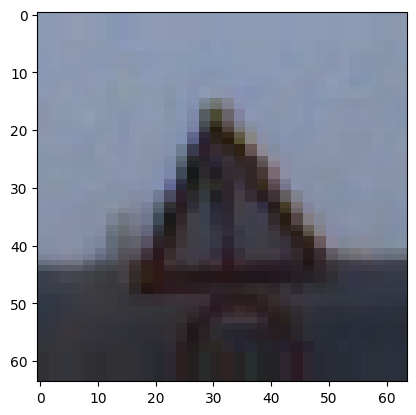

In [50]:
for i in range(1):
  images, labels = next(test_data)

  image = images[i]
  label = labels[i]

  plt.imshow(image)


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

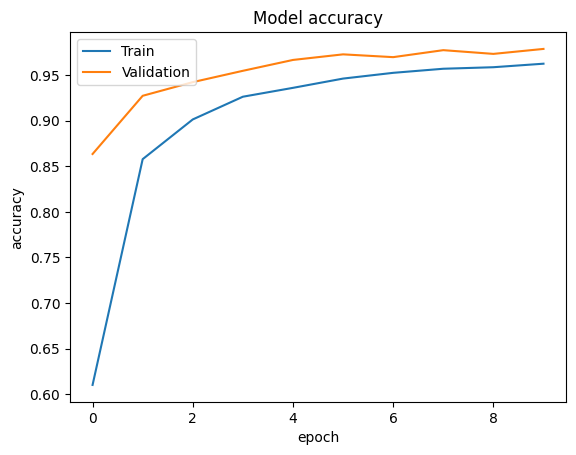

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


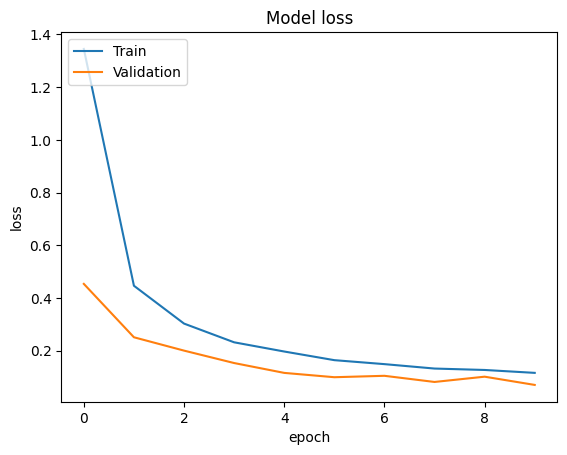

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Save the Model
Save the trained CNN model for submission.

In [55]:
model.save('CNN_Model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

Q1: Data Preprocessing: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?

A1: I did normalization becuase I want to normalize the image (the pixels) between the [0 - 1 ] range.

I resize the image to be (64, 64) to be smaller and all the images have unified size.

I did the data augmentation becuse I want the model learn from diversity new images and have some noise to ensure the model be good and strong with real life images with different satutaions


Q2: Model Architecture: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?

A2:
The number of convolutional layers is : 3 Conv2D layers, The kernel sizes are : (3,3) and in some layers (4,4), the kernel size is the filter applied on the CNN
I choose the max pooling layers and it will take the maximum value

I also put some dropout with 0.5 ration to prevent the overfitting during the training

Q3: Activation Functions: Justify your choice of activation functions. How do they influence the training and output of your CNN?

A3: I used the relu activation funcation witch will make all the negitive values to 0 and the positive values keep them same.

also I use the softmax for the last layer becuse it is satiable for the multi classifiaction tasks.


Q4: Training Process: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?

I choose the batch size to be 32 witch will take 32 exaples for eact step, and number of epochs is 10, I think my model is complex and it will do good job so I choose the number of epochs to be small.


Q5: Loss Function and Metrics: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?

I choose the categorical crossentropy because the task is multi classification task.

Q6: Regularization Techniques: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.

I used the dropout to prevent the overfitting

Q7: Model Evaluation: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?

I choose the evaluate funcation witch will return for me the loss and the accuracy for the model.

**Q8: Model Visualization: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?**


**Q9: Overfitting and Underfitting: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?**